In [1]:
import sys
from pathlib import Path
sys.path.append(str(Path("..").resolve()))

import pandas as pd

matches = pd.read_csv("../data/processed/matches_clean.csv")

In [2]:
modern = matches[matches["year"].isin([2010, 1930])]
modern.head()

,year,datetime,stage,stadium,city,home_team_name,home_team_goals,away_team_goals,away_team_name,win_conditions,...,half_time_home_goals,half_time_away_goals,referee,assistant_1,assistant_2,roundid,matchid,home_team_initials,away_team_initials,total_goals
0,1930,1930-07-13 15:00:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,...,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX,5
1,1930,1930-07-13 15:00:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,...,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL,3
2,1930,1930-07-14 12:45:00,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,...,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA,3
3,1930,1930-07-14 14:50:00,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,...,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER,4
4,1930,1930-07-15 16:00:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,...,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA,1


In [3]:
kpi_modern = (
    modern.groupby("year")
    .agg(
        matches=("matchid","nunique"),
        total_goals=("total_goals","sum"),
        goals_per_match=("total_goals","mean"),
        avg_attendance=("attendance","mean")
    )
    .reset_index()
)

kpi_modern

,year,matches,total_goals,goals_per_match,avg_attendance
0,1930,18,70,3.888889,32808.277778
1,2010,64,145,2.265625,49669.625000


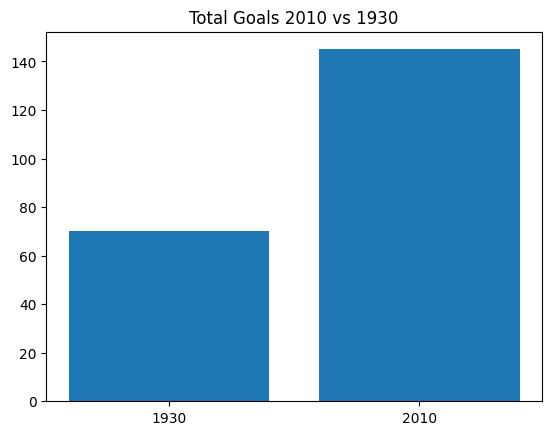

In [4]:
import matplotlib.pyplot as plt

plt.bar(kpi_modern["year"].astype(str), kpi_modern["total_goals"])
plt.title("Total Goals 2010 vs 1930")
plt.show()

In [5]:
modern.groupby("year")["total_goals"].mean()

year
1930    3.888889
2010    2.265625
Name: total_goals, dtype: float64

In [6]:
summary = (
    matches.groupby("year")
    .agg(
        matches=("matchid","nunique"),
        total_goals=("total_goals","sum"),
        goals_per_match=("total_goals","mean"),
        avg_attendance=("attendance","mean")
    )
    .reset_index()
)

summary["goals_per_team"] = summary["total_goals"] / (
    matches.groupby("year")["home_team_name"].nunique().values
)

summary.tail()

,year,matches,total_goals,goals_per_match,avg_attendance,goals_per_team
17,2006,64,147,2.296875,52491.234375,4.593750
18,2010,64,145,2.265625,49669.625000,4.531250
19,2014,64,171,2.671875,53758.888889,5.343750
20,2018,36,117,2.785714,50529.666667,4.875000
21,2022,2,119,2.704545,53732.045455,4.958333


In [7]:
summary.to_csv("../data/processed/kpi_worldcup.csv", index=False)